In [1]:
from numpy import mean
from numpy import std
from matplotlib import pyplot
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

载入数据

In [2]:
def load_dataset():
    (x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
    print('x_train shape',x_train.shape)
    print('y_train shape',y_train.shape)
    
    #将样本数据转化为4维
    x_train=x_train.reshape((x_train.shape[0],28,28,1))
    x_test=x_test.reshape((x_test.shape[0],28,28,1))
    
    #标签数据转化为one-hot编码
    y_train=to_categorical(y_train)
    y_test=to_categorical(y_test)
    
    return x_train,y_train,x_test,y_test

数据预处理

In [3]:
def prep_pixels(train,test):
    train=train.astype('float32')
    test=test.astype('float32')
    train=train/255.0
    test=test/255.0
    return train,test

建立模型

In [4]:
def define_model():
    model=Sequential()
    model.add(Conv2D(8,(3,3),activation='relu',kernel_initializer='he_uniform',input_shape=(28,28,1)))
    model.add(MaxPooling2D((2,2)))
    
    model.add(Flatten())
    model.add(Dense(120,activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(10,activation='softmax'))
    
    opt=SGD(learning_rate=0.01,momentum=0.9)
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
    print(model.summary())
    return model

评估模型

In [5]:
def evaluate_model(dataX,dataY,n_folds=5):
    scores,histories=list(),list()
    kflod=KFold(n_folds,shuffle=True,random_state=1)
    
    for train_i,test_i in kflod.split(dataX):
        model=define_model()
        trainX,trainY,testX,testY=dataX[train_i],dataY[train_i],dataX[test_i],dataY[test_i]
        history=model.fit(trainX,trainY,batch_size=60,epochs=10,verbose=0,validation_data=(testX,testY))
        acc=model.evaluate(testX,testY,verbose=0)[1]
        scores.append(acc)
        histories.append(history)
        
    print("scores",scores)
    return scores,histories

可视化

In [6]:
def summarize_diagnostics(histories):
    for i in range(len(histories)):
        pyplot.subplot(2,1,1)
        pyplot.title('Cross Entropy Loss')
        pyplot.plot(histories[i].history['loss'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_loss'],color='orange',label='test')
        pyplot.ylabel('loss')
        pyplot.xlabel('epoch')
        pyplot.legend(['train','test'],loc='upper right')
        
        pyplot.subplot(2,1,2)
        pyplot.title('Classification Accuracy')
        pyplot.plot(histories[i].history['accuracy'],color='blue',label='train')
        pyplot.plot(histories[i].history['val_accuracy'],color='orange',label='test')
        pyplot.ylabel('accuracy')
        pyplot.xlabel('epoch')
        pyplot.legend(['train','test'],loc='upper right')
    pyplot.show()

In [7]:
def summarize_performance(scores):
    print('Accuracy: mean=%.3f std=%.3f,n=%d'% (mean(scores)*100,std(scores)*100,len(scores)))
    pyplot.boxplot(scores)
    pyplot.show()

x_train shape (60000, 28, 28)
y_train shape (60000,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 120)               162360    
                                                                 
 dense_1 (Dense)             (None, 10)                1210      
                                                                 
Total params: 163,650
Trainable params: 163,650
Non-trainable params:

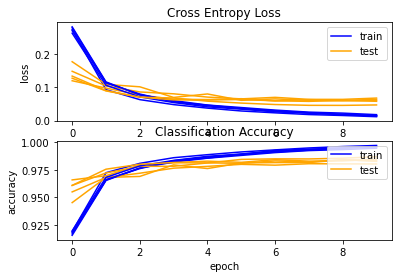

Accuracy: mean=98.348 std=0.217,n=5


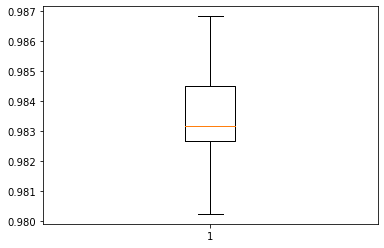

In [8]:
trainX,trainY,testX,testY=load_dataset()
#print(trainX)
trainX,testX=prep_pixels(trainX,testX)
scores,histories=evaluate_model(trainX,trainY)
summarize_diagnostics(histories)
summarize_performance(scores)